<a href="https://colab.research.google.com/github/yikes-dotcom/StockForecast/blob/main/Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
!pip install yfinance

from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'TSLA', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'TSLA', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, TSLA, AMZN]
company_name = ["Apple", "Tesla", "Amazon"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10) ##changed by me to head change back to tail if error

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-15,112.500000,115.589996,111.589996,113.550003,113.550003,83891100,Amazon
2022-07-18,115.000000,117.239998,113.150002,113.760002,113.760002,59115400,Amazon
2022-07-19,115.699997,118.949997,114.029999,118.209999,118.209999,60990000,Amazon
2022-07-20,118.620003,123.480003,118.320000,122.769997,122.769997,71268300,Amazon
2022-07-21,123.199997,124.849998,121.260002,124.629997,124.629997,60239900,Amazon
2022-07-22,125.010002,125.500000,121.349998,122.419998,122.419998,51402700,Amazon
2022-07-25,122.699997,123.639999,120.029999,121.139999,121.139999,50221300,Amazon
2022-07-26,115.790001,118.150002,114.529999,114.809998,114.809998,67075100,Amazon
2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000,Amazon


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-07-28 to 2022-07-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


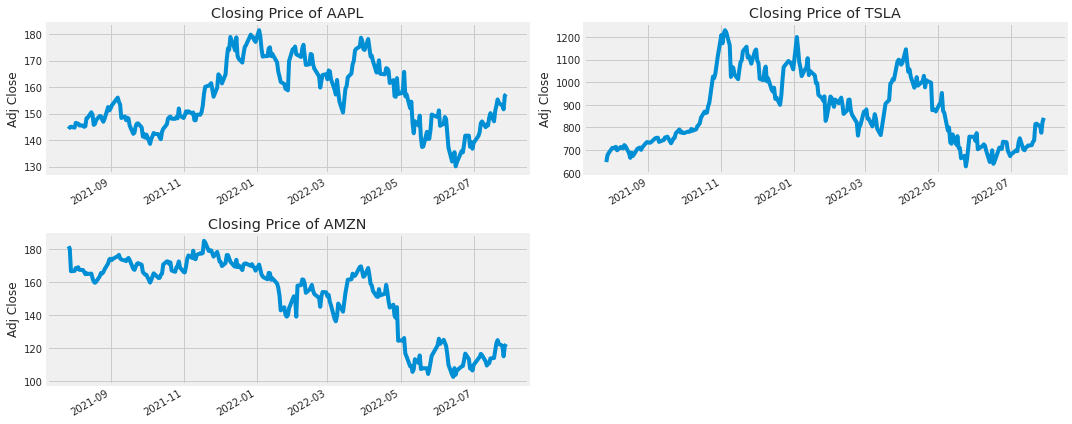

In [ ]:
# Summary Stats
AAPL.describe()

# General info
AAPL.info()

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()




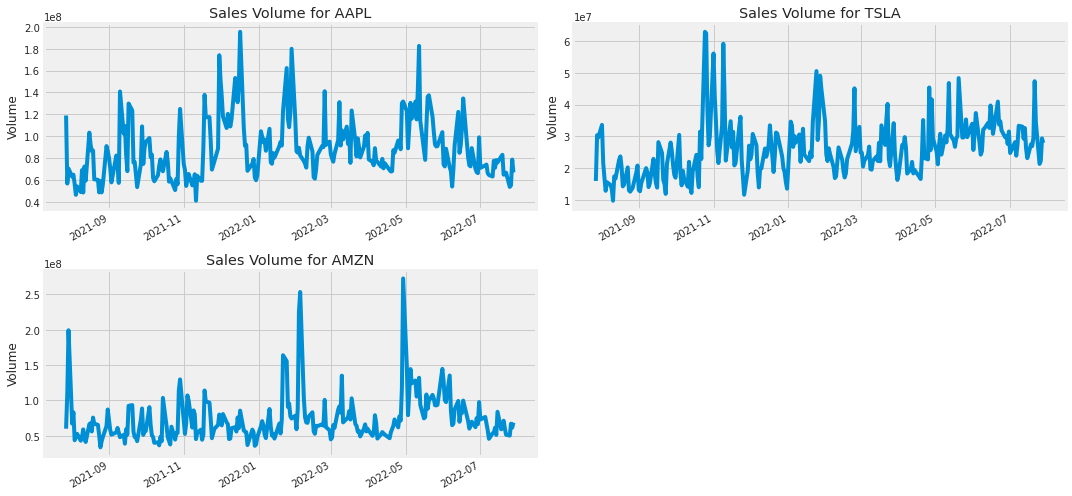

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()


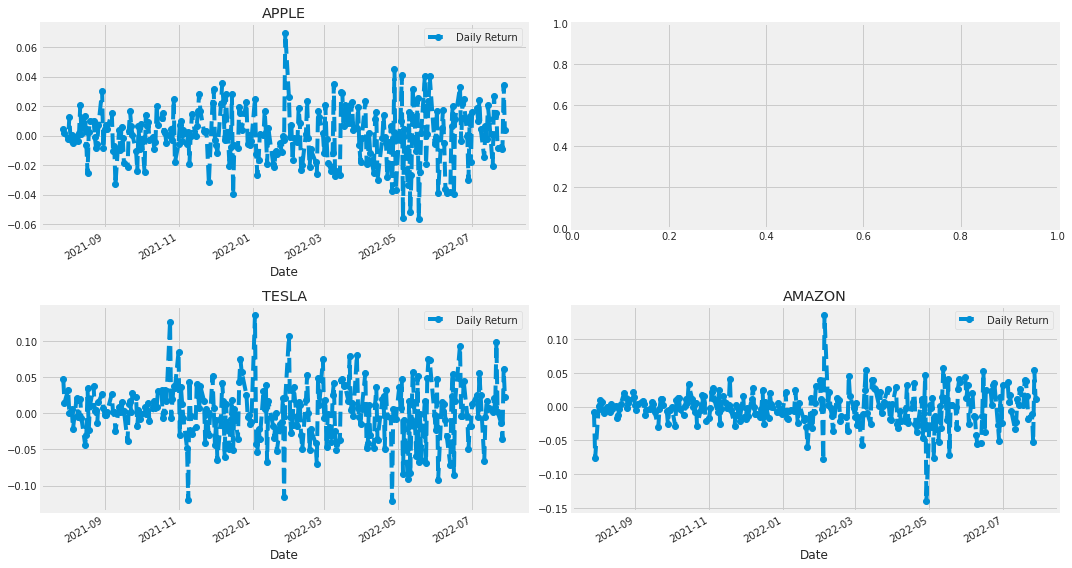

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('TESLA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

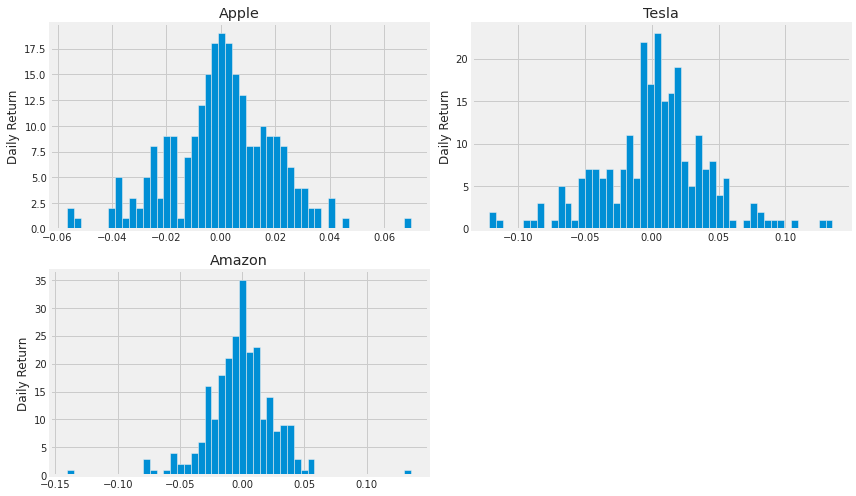

In [ ]:
#daily return checker

plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
AAPL = yf.download('AAPL')

AMZN = yf.download('AMZN')

TSLA = yf.download('TSLA')


# Set up End and Start times for data grab

df = pd.concat([AAPL, AMZN, TSLA])
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
   # globals()[stock] = yf.download(stock, start = '2015-01-01', end)
    data = yf.download(stock, start="2015-01-01", end="2022-07-21")
    print('data fields downloaded:', set(data.columns.get_level_values(0)))


data



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
data fields downloaded: {'Close', 'Adj Close', 'Open', 'Volume', 'Low', 'High'}
[*********************100%***********************]  1 of 1 completed
data fields downloaded: {'Close', 'Adj Close', 'Open', 'Volume', 'Low', 'High'}
[*********************100%***********************]  1 of 1 completed
data fields downloaded: {'Close', 'Adj Close', 'Open', 'Volume', 'Low', 'High'}


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2022-07-14,110.239998,111.180000,107.580002,110.629997,110.629997,51163100
2022-07-15,112.500000,115.589996,111.589996,113.550003,113.550003,83891100
2022-07-18,115.000000,117.239998,113.150002,113.760002,113.760002,59115400


In [ ]:
import pandas as pd

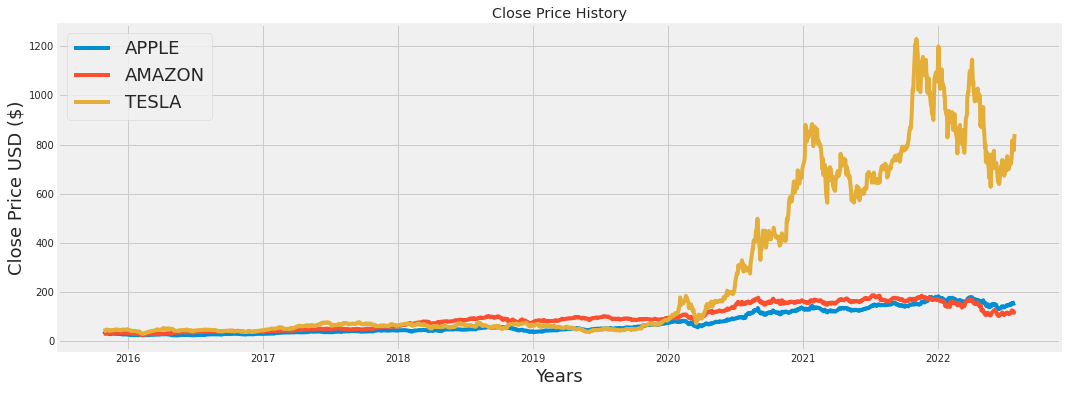

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(AAPL.iloc[(AAPL.shape[0]-1700):(AAPL.shape[0]), :]['Close'], label="APPLE")
plt.plot(AMZN.iloc[(AMZN.shape[0]-1700):(AMZN.shape[0]), :]['Close'], label="AMAZON")
plt.plot(TSLA.iloc[(TSLA.shape[0]-1700):(TSLA.shape[0]), :]['Close'], label="TESLA")

plt.legend(loc="upper left", fontsize=18)

plt.xlabel('Years', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

18886

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[6.44308563e-05],
       [5.89863438e-05],
       [5.17261738e-05],
       ...,
       [6.31397334e-01],
       [6.70328569e-01],
       [6.85159506e-01]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


x_train , y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([6.44308563e-05, 5.89863438e-05, 5.17261738e-05, 5.39947202e-05,
       5.67177974e-05, 6.26160168e-05, 6.76068346e-05, 7.21447391e-05,
       7.80429706e-05, 8.89328196e-05, 9.07476592e-05, 8.75716930e-05,
       8.39420139e-05, 8.53031406e-05, 8.25808873e-05, 7.71355448e-05,
       7.21447391e-05, 6.98761988e-05, 7.57744182e-05, 7.48670045e-05,
       7.07836125e-05, 7.12373254e-05, 7.35058779e-05, 7.25984520e-05,
       7.94040973e-05, 7.57744182e-05, 7.80429706e-05, 7.94040973e-05,
       7.89503843e-05, 7.71355448e-05, 7.62281311e-05, 7.25984520e-05,
       6.85150601e-05, 6.26160168e-05, 5.67177974e-05, 6.03474764e-05,
       6.39771555e-05, 6.39771555e-05, 6.44308563e-05, 5.89863438e-05,
       5.89863438e-05, 5.58103776e-05, 5.49021400e-05, 5.26335936e-05,
       5.49021400e-05, 5.89863438e-05, 5.30873005e-05, 4.80964948e-05,
       4.94576214e-05, 4.62816552e-05, 5.17261738e-05, 5.30873005e-05,
       5.62640845e-05, 5.67177974e-05, 5.53566647e-05, 5.44484331e-05,
     

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
#model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape, [1], 1)))

model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences  = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, batch_size = 128, epochs = 3)


Epoch 1/3
148/148 [==============================] - 46s 280ms/step - loss: 4.0176e-05
Epoch 2/3
148/148 [==============================] - 41s 279ms/step - loss: 8.0701e-06
Epoch 3/3
148/148 [==============================] - 41s 278ms/step - loss: 6.8637e-06


In [ ]:
test_data = scaled_data[training_data_len - 60: ,:]
x_test=[]

y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rsme = np.sqrt(np.mean(((predictions - y_test)**2)))

rsme

49.7070908524259

In [ ]:
#accuracy
import numpy as np
from sklearn.metrics import balanced_accuracy_score

#define array of actual classes
actual = np.repeat([1, 0], repeats=[20, 380])

#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[15, 5, 5, 375])

#calculate balanced accuracy score
balanced_accuracy_score(actual, pred)

0.868421052631579

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


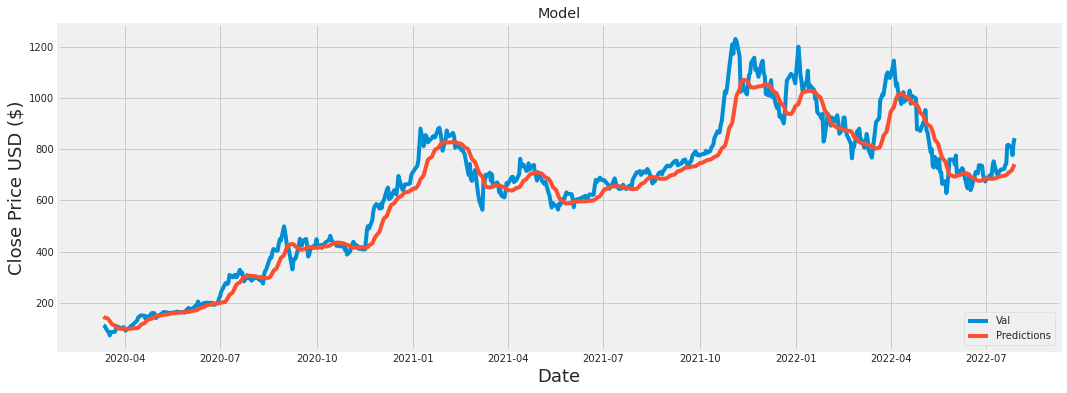

In [ ]:
# Plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


# Visualize 
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train.iloc[(train.shape[0]-600) : (train.shape[0]), :]['Close'])
plt.plot(valid.iloc[(valid.shape[0]-600) : (valid.shape[0]), :][['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()